# Plotting sequence logos

The code in this tutorial is released under the [MIT License](https://opensource.org/licenses/MIT). All the content in this notebook is under a [CC-by 4.0 License](https://creativecommons.org/licenses/by/4.0/). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../RegSeq/')

%matplotlib inline

# logomaker import
import logomaker

In [2]:
# Load in a binding site matrix.
arraydf = pd.io.parsers.read_csv('../data/example_arrays/aphAAnaerodataset_alldone_with_largeMCMC194_activator',
                                 delim_whitespace=True,index_col='pos')
# Rename columns to be useable by the logomaker package
arraydf = arraydf.rename(columns={'val_A':'A','val_C':'C','val_G':'G','val_T':'T'})

We first need to find the proper scaling factor for conversion to information logo. Empirically, it is known
that binding sites have approximately 1 bit of information per base pair.

In [16]:
def get_info(df):
    '''Finds the total information content of a binding site.'''
    # background probabilities for E. coli bases
    gc = .508
    background_array = np.array([(1 - gc) / 2, gc / 2, gc / 2, (1 - gc) / 2])
    
    #add in small value to make sure no probabilities are exactly zero.
    df = df + 1e-9
    
    return np.sum(df.values * np.log2(df.values/background_array))

In [17]:
def get_beta_for_effect_df(
    effect_df,
    target_info,
    min_beta=.001,
    max_beta=100,
    num_betas=1000):
    '''Find the appropriate scaling factor for displaying sequence
    logos. '''
    betas = np.exp(np.linspace(np.log(min_beta),np.log(max_beta),num_betas))
    infos = np.zeros(len(betas))
    for i, beta in enumerate(betas):
        prob_df = logomaker.transform_matrix(df=beta*effect_df,from_type='weight',to_type='probability')
        infos[i] = get_info(prob_df)
    i = np.argmin(np.abs(infos-target_info))
    beta = betas[i]
    return beta

In [18]:
# finding scaling factor
target_info = len(arraydf.index)
beta = get_beta_for_effect_df(arraydf,target_info)

# use logomaker to convert energy matrix to information matrix
binding_info = logomaker.transform_matrix(df=beta*arraydf,from_type='weight',to_type='information')

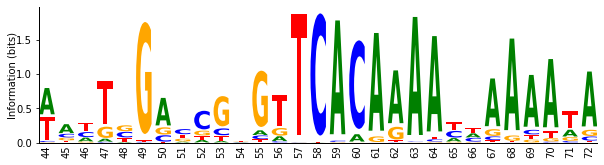

In [19]:
binding_logo = logomaker.Logo(binding_info,
                         font_name='Stencil Std',
                         vpad=.1,
                         width=.8)

# style using Logo methods
binding_logo.style_spines(visible=False)
binding_logo.style_spines(spines=['left', 'bottom'], visible=True)
binding_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
binding_logo.ax.set_ylabel("Information (bits)", labelpad=-1)
binding_logo.ax.xaxis.set_ticks_position('none')
binding_logo.ax.xaxis.set_tick_params(pad=-1)

Finally, here are the versions of packages used in this notebook. To display the versions, we are using the Jupyter Lab extension `watermark`, which can be found [here](https://github.com/rasbt/watermark).

## Computing environment

In [20]:
%load_ext watermark
%watermark -v -p jupyterlab,numpy,pandas,logomaker,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.9
IPython 7.13.0

jupyterlab 2.0.1
numpy 1.18.1
pandas 1.0.3
logomaker 0.8
matplotlib 3.1.3
